In [66]:
import numpy as np
import matplotlib.pyplot as plt

def plot_segmentation_comparison(gt, asot, omp, comp, asot_mapping=None, name=''):
    """
    Visualize segmentation comparison across Ground Truth, ASOT, OMPN, and CompILE.

    Parameters:
        gt (list or np.array): Ground truth labels.
        asot (list or np.array): ASOT predicted labels.
        omp (list or np.array): OMPN predicted labels.
        comp (list or np.array): CompILE predicted labels.
        asot_mapping (dict): Mapping from ASOT predicted labels to GT labels.
        name (str): Title for the plot.
    """
    gt = np.array(gt)
    asot = np.array(asot)
    omp = np.array(omp)
    comp = np.array(comp)
    
    n_frames = len(gt)
    assert all(len(arr) == n_frames for arr in [asot, omp, comp]), "All input arrays must have the same length."

    # Get all unique labels across all predictions and GT
    all_labels = np.unique(np.concatenate([gt, list(asot_mapping.keys()) if asot_mapping else [], omp, comp]))
    if -1 not in all_labels:
        all_labels = np.append(all_labels, -1)

    n_class = len(all_labels)
    if n_class <= 20:
        cmap = plt.get_cmap('tab20')
    else:
        cmap1 = plt.get_cmap('tab20')
        cmap2 = plt.get_cmap('tab20b')
        cmap = lambda x: cmap1(round(x * n_class / 20., 2)) if x <= 19. / n_class else cmap2(round((x - 20 / n_class) * n_class / 20, 2))

    # Assign consistent colors for labels
    colors = {}
    for i, label in enumerate(all_labels):
        if label == -1:
            colors[label] = (0, 0, 0)
        else:
            colors[label] = cmap(i / n_class)

    def plot_segments(ax, sequence, label, color_mapping=None):
        ax.set_ylabel(label, fontsize=20, rotation=0, labelpad=40, verticalalignment='center')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        segment_boundaries = np.where(sequence[1:] - sequence[:-1])[0] + 1
        segment_boundaries = np.concatenate(([0], segment_boundaries, [len(sequence)]))
        for start, end in zip(segment_boundaries[:-1], segment_boundaries[1:]):
            original_label = sequence[start]
            label_to_use = color_mapping.get(original_label, original_label) if color_mapping else original_label
            ax.axvspan(start / n_frames, end / n_frames, facecolor=colors.get(label_to_use, (0, 0, 0)), alpha=1.0)
            ax.axvline(start / n_frames, color='black', linewidth=2)
            ax.axvline(end / n_frames, color='black', linewidth=2)

    fig = plt.figure(figsize=(16, 6))
    plt.axis('off')
    plt.title(name, fontsize=25, pad=20)

    axs = [fig.add_subplot(4, 1, i+1) for i in range(4)]
    plot_segments(axs[0], gt, 'Truth')
    plot_segments(axs[1], asot, 'ASOT', color_mapping=asot_mapping or {})
    plot_segments(axs[2], omp, 'OMPN')
    plot_segments(axs[3], comp, 'CompILE')

    fig.tight_layout()
    return fig


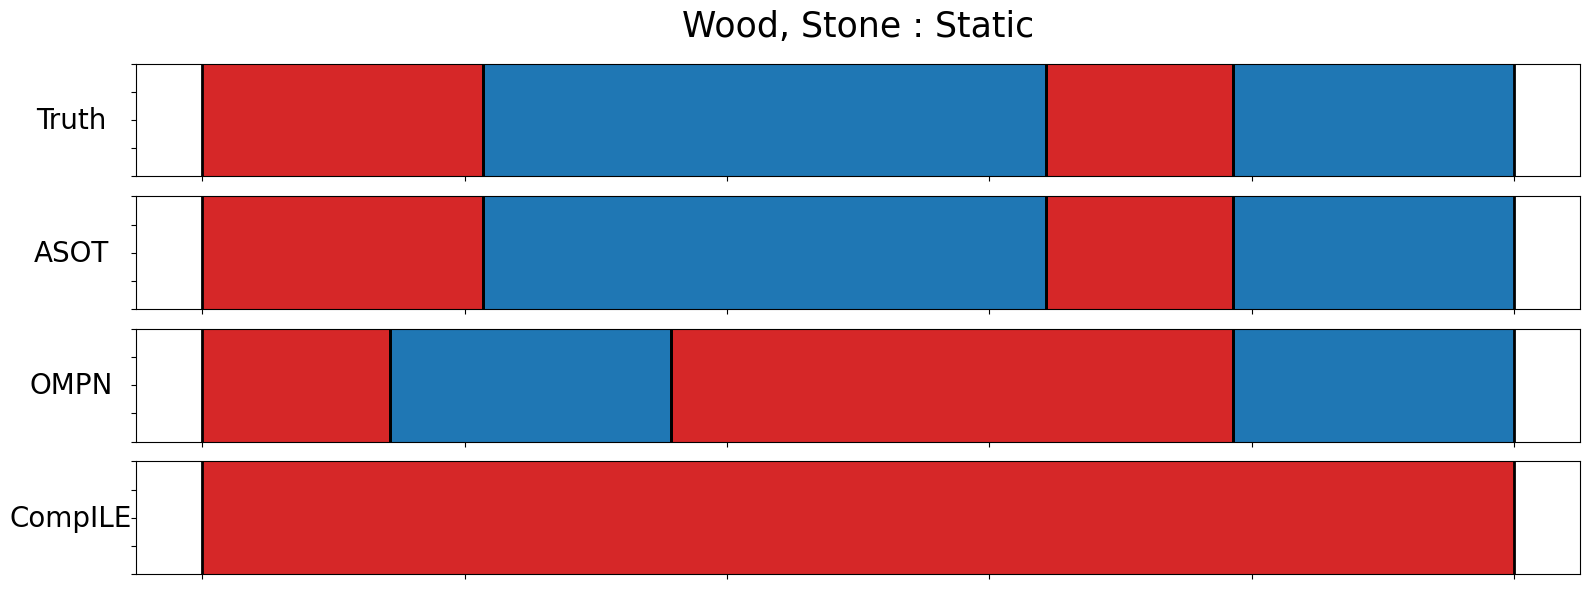

In [67]:
# WSWS STATIC CRAFTAX 0

GT =        [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
ASOT =      [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]

OMPN =      [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0]
CompILE =   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1] # TODO

asot_map =  {0: 0, 1: 1}

fig = plot_segmentation_comparison(GT, ASOT, OMPN, CompILE, asot_map, name="Wood, Stone : Static")
plt.show()


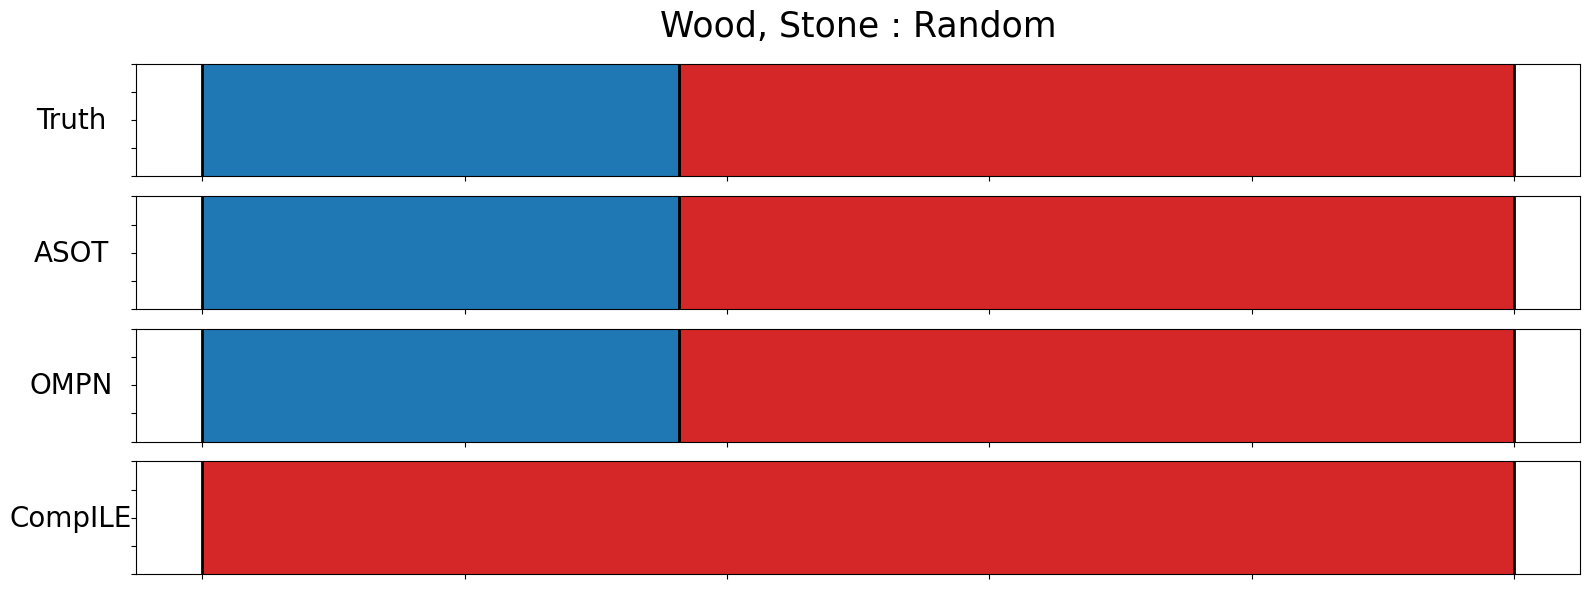

In [68]:
# WSWS RANDOM (CRAFTAX 100)

GT =        [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
ASOT =      [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

OMPN =      [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]
CompILE =   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] # TODO

asot_map =  {0: 1, 1: 0}

fig = plot_segmentation_comparison(GT, ASOT, OMPN, CompILE, asot_map, name="Wood, Stone : Random")
plt.show()

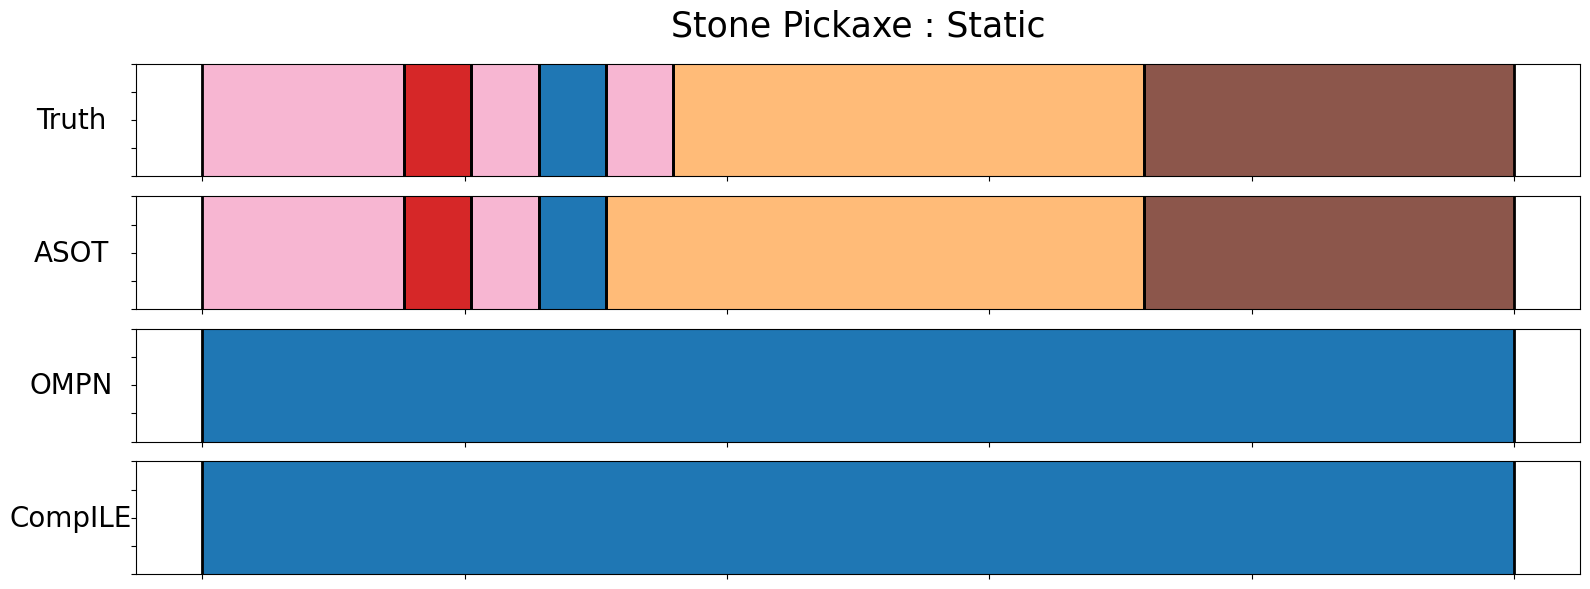

In [69]:
# Stone Pick Static Craftax 236

GT =        [4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 0, 0, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

ASOT =      [0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
asot_map =  {0: 4, 1:1, 2:3, 3:2, 4:0}

OMPN =      [0 for _ in range(len(ASOT))] # TODO 

CompILE =   [0 for _ in range(len(OMPN))] # TODO


fig = plot_segmentation_comparison(GT, ASOT, OMPN, CompILE, asot_map, name="Stone Pickaxe : Static")
plt.show()

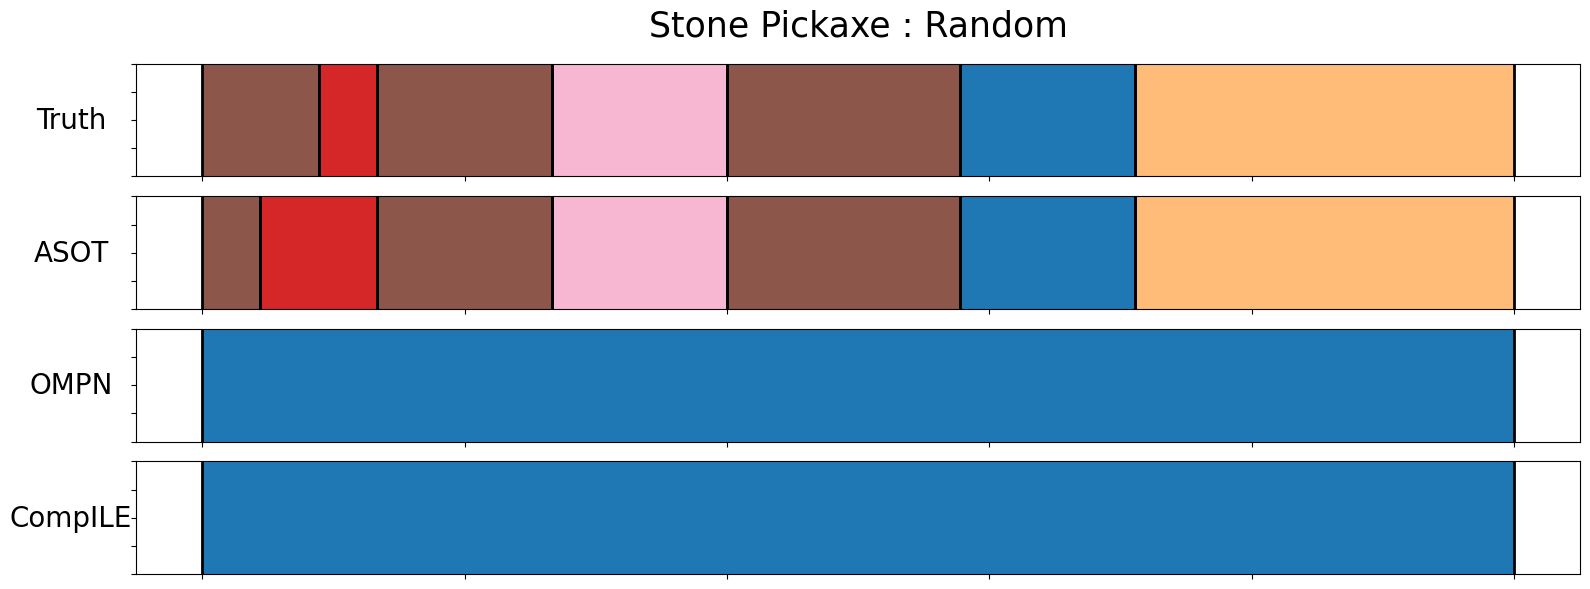

In [70]:
# Stone Pick Random Craftax 16

GT =        [3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

ASOT =      [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

asot_map =  {0: 3, 1:2, 2:0, 3:4, 4:1}

OMPN =      [0 for _ in range(len(ASOT))] # TODO

CompILE =   [0 for _ in range(len(OMPN))] # TODO


fig = plot_segmentation_comparison(GT, ASOT, OMPN, CompILE, asot_map, name="Stone Pickaxe : Random")
plt.show()

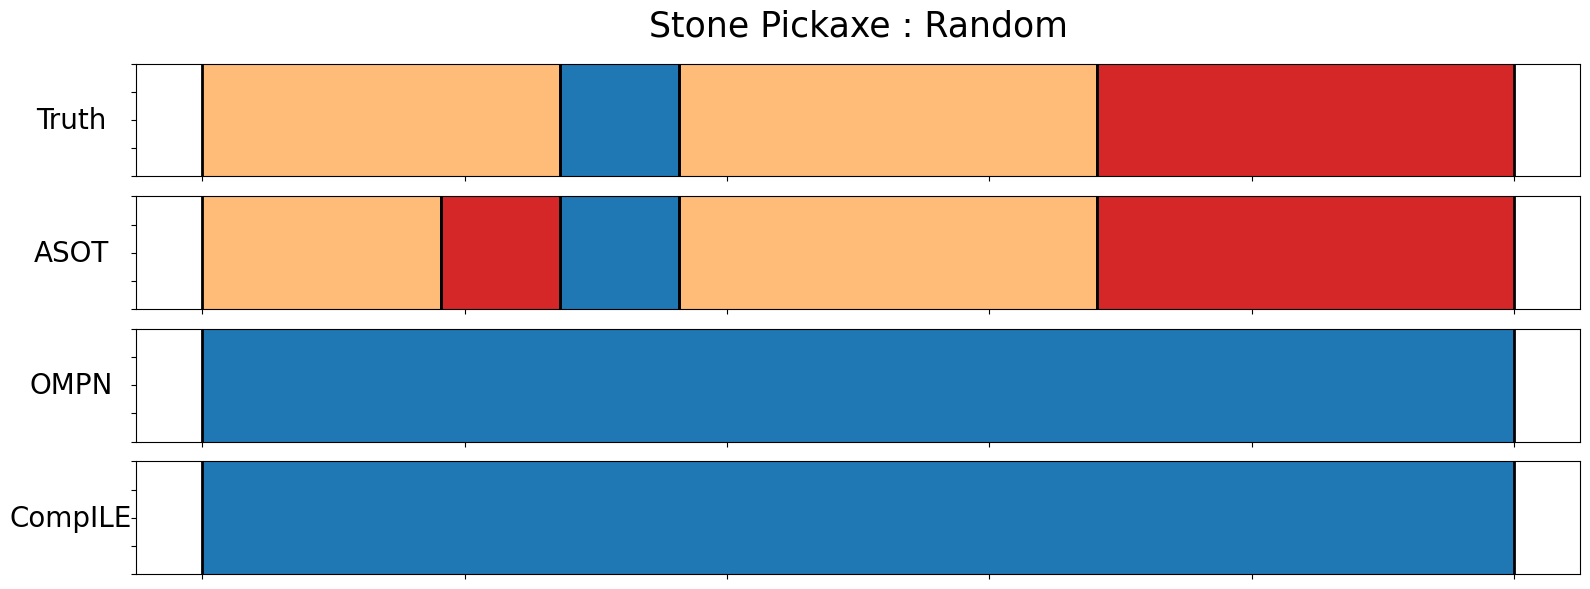

In [72]:
# Mixed Static Craftax 487

GT =        [1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,  1, 1, 1, 2, 2, 2, 2, 2, 2, 2]

ASOT =      [0, 0, 0, 0, 4, 4, 3, 3, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4]

asot_map =  {0: 1, 1:4, 2:3, 3:0, 4:2}

OMPN =      [0 for _ in range(len(ASOT))] # TODO

CompILE =   [0 for _ in range(len(OMPN))] # TODO


fig = plot_segmentation_comparison(GT, ASOT, OMPN, CompILE, asot_map, name="Stone Pickaxe : Random")
plt.show()